In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
 np.round(np.random.rand(1, 3),0) - 0.5

array([[ 0.5,  0.5, -0.5]])

In [20]:
def walk_a_step(current_positions, mode="randn"):
    """current position is an array with the 
    x-positions of the runnsers."""
    
    if mode == "randn":
        # for simplification i just add normal random noise
        # to the current position
        d1, d2 = current_positions.shape
        current_positions += np.random.randn(d1, d2)
    
    elif mode == "discrete":
        # add +-0.5 .
        # rand = between 0 and 1. Round(rand) = 0 or 1. -0.5 shifts it to +- 0.5
        current_positions += np.round(np.random.rand(*current_positions.shape),0) - 0.5
    else:  
        raise ValueError("Unknown walking mode: " + str(mode))
    
    return current_positions

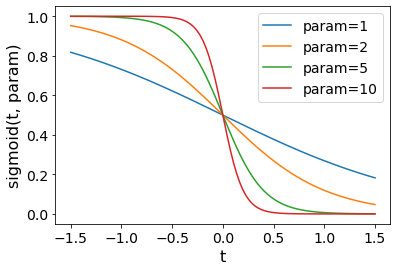

In [21]:
def sigmoid(x, tuning_parameter=10):
    """Used as splitting function? It is the
    probability for a runner to die. 
    
    The tuning parameter determines how fast 
    the porbability decreases increses
    
    # This is not a normal sigmpoid, I changed the sign 
    in the exponent so that :
     - t --> -infty => sigmoid --> 1, and
     - t --> infty => sigmoid --> 0
    """
    return 1/(1+ np.exp(x * tuning_parameter))
    
t = np.linspace(-1.5, 1.5, 100)
for param in [1, 2, 5, 10]:
    plt.plot(t, sigmoid(t, param), label=f"param={param}")

plt.xlabel("t", fontsize=16)
plt.ylabel("sigmoid(t, param)", fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [22]:

def kill_and_split(current_positions):
    """Kill bad runners and replace their position with the position 
    of a good runner."""
    
    
    #--- killing bad runners ---
    # logical array (same length of runners). We will mark the killed runners here
    # @vali: In the other code this is the death mask
    is_runner_killed = np.zeros_like(current_positions).astype(bool)
    
    for index_runner, x in enumerate(current_positions):
        
        # should this runner be killed?
        if np.random.rand(1) < sigmoid(x):
            
            # mark killed runner in the "death mask"
            is_runner_killed[index_runner] = True  
            
            
            # this makes sure that only one runner can be killed at each 
            # time step, because I am too lazy to implement
            # what should happen if all of the runners die
            break
    #--- 
    
    # it at least one runner dies in this run
    if np.sum(is_runner_killed) > 0:
    

        # list of indices of runners.
        # we will delete the killed runners from the list
        # (the remaining runners can then be used for splitting)
        remaining_runners = np.arange(len(current_positions))

        # remove the killed runners
        remaining_runners = remaining_runners[np.logical_not(is_runner_killed)]




        #--- splitting the remaing runners ---

        new_positions_for_killed_runners = []
        for _ in range(np.sum(is_runner_killed)):

            # select a remaining runner to be "split":
            # I.e. its position is copied to replace the old position 
            # of the killed runner.
            # TODO: implement a probability, so that better runners
            # are more likely to be split
            new_positions_for_killed_runners.append(
                np.random.choice(current_positions[remaining_runners])
            )

        
        # replace the position of the old runners with the position 
        # of a remaining runner.
        current_positions[is_runner_killed] = new_positions_for_killed_runners
        
    return current_positions

/home/jcartus/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
a = np.array([2, 56, 23, 62, 1])
np.random.choice(a)

23

# Run the simulation

In [23]:
N_TIME_STEPS = 20
N_RUNNERS = 3
RUNNER_MODE = "discrete"
#RUNNER_MODE = "randn"

In [24]:
# the position of the runner at the current time step
current_positions = np.zeros(N_RUNNERS)

# log of the runner positions that we will plot later
runner_postions = [list(current_positions)]


for time_index in range(N_TIME_STEPS):
    
    # after the 5th time step start killing
    if time_index > 1:
        pass
        current_positions = kill_and_split(current_positions)
    
    #print(current_positions)
    
    # do the random walking
    current_positions = walk_a_step(current_positions, mode=RUNNER_MODE)
    #current_positions = walk_a_step(current_positions, mode="randn")
    
    # record position of runners after the current time step
    runner_postions.append(list(current_positions))
    
np.asarray(runner_postions)

array([[ 0. ,  0. ,  0. ],
       [ 0.5,  0.5, -0.5],
       [ 0. ,  0. ,  0. ],
       [ 0.5, -0.5, -0.5],
       [ 1. ,  1. , -1. ],
       [ 0.5,  1.5,  1.5],
       [ 1. ,  1. ,  1. ],
       [ 1.5,  1.5,  0.5],
       [ 2. ,  1. ,  0. ],
       [ 2.5,  1.5,  0.5],
       [ 2. ,  1. ,  0. ],
       [ 1.5,  1.5,  2.5],
       [ 2. ,  1. ,  3. ],
       [ 1.5,  1.5,  2.5],
       [ 2. ,  1. ,  2. ],
       [ 1.5,  1.5,  1.5],
       [ 2. ,  2. ,  2. ],
       [ 2.5,  2.5,  1.5],
       [ 3. ,  2. ,  1. ],
       [ 2.5,  2.5,  1.5],
       [ 3. ,  2. ,  2. ]])

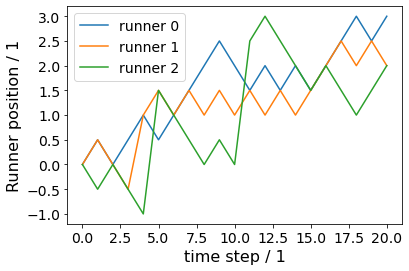

In [25]:
time_steps = np.arange(N_TIME_STEPS)

# convert list -> np.array (easier to index)
runner_postions = np.asarray(runner_postions)

for index_runner in range(N_RUNNERS):
    
    plt.plot(runner_postions[:, index_runner], label=f"runner {index_runner}")
    
plt.legend(fontsize=14)
plt.xlabel("time step / 1", fontsize=16)
plt.ylabel("Runner position / 1", fontsize=16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
    

In [ ]:

def walk(x, n_step):
    """Random walk for n_Step steps"""
    pass

    # new x after n_Steps
    return x

n_splitting_events = 4

for index_splitting in range(n_splitting_events):
    
    # walks
    x = walk(x, n_step=200)
    
    # decide to kill
    for i, xi in enumerate(x): 
        
        to_be_killed = np.zeros_like(x)
        if np.random.rand(1) < sigmoid(ix):
            to_be_killed[i] = True
        
    # replace
    for i, should_be_killed in enumerate(to_be_killed):
        
        if should_be_killed:
            x[i] = np.random.choice(x[~to_be_killed])
            
    


